# Lesson 6. Spatial Queries

In spatial analysis, our goal is not just to make nice maps,
but to actually run analyses that leverage the explicitly spatial
nature of our data. The process of doing this is known as 
**spatial analysis**.

To construct spatial analyses, we string together series of spatial
operations in such a way that the end result answers our question of interest.
There are many such spatial operations. These are known as **spatial queries**.


- 6.0 Load and prep some data
- 6.1 Measurement Queries
- 6.2 Relationship Queries
- **Exercise**: Spatial Relationship Query
- 6.3 Proximity Analysis
- **Exercise**: Proximity Analysis
- 6.4 Recap





<br>
<font color='grey'>
    <b>Instructor Notes</b>

- Datasets used
    - 'notebook_data/census/Tracts/cb_2013_06_tract_500k.zip'
    - 'notebook_data/protected_areas/CPAD_2020a_Units.shp'
    - 'notebook_data/berkeley/BerkeleyCityLimits.shp'
    - 'notebook_data/alco_schools.csv'
    - 'notebook_data/transportation/BerkeleyBikeBlvds.geojson'
    - 'notebook_data/transportation/bart.csv'

- Expected time to complete
    - Lecture + Questions: 45 minutes
    - Exercises: 20 minutes
</font>

-------------------

We will start by reviewing the most
fundamental set, which we'll refer to as **spatial queries**.
These can be divided into:

- <u>Measurement queries</u>
    - What is feature A's **length**?
    - What is feature A's **area**?
    - What is feature A's **perimeter**?
    - What is feature A's **distance** from feature B?
    - etc.
- <u>Relationship queries</u>
    - Is feature A **within** feature B?
    - Does feature A **intersect** with feature B?
    - Does feature A **cross** feature B?
    - etc.
    
We'll work through examples of each of those types of queries.

Then we'll see an example of a very common spatial analysis that 
is a conceptual amalgam of those two types: **proximity analysis**.

In [1]:
library(sf)
library(tmap)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.2



# 6.0 Load and prep some data

Let's read in our census tracts data again.

Reading layer `cb_2013_06_tract_500k' from data source `/home/drew/Desktop/stuff/berk/dlab/Geospatial-Fundamentals-in-R-with-sf/rewrite/notebook_data/census/Tracts/cb_2013_06_tract_500k.shp' using driver `ESRI Shapefile'
Simple feature collection with 8043 features and 9 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -124.4096 ymin: 32.53416 xmax: -114.1312 ymax: 42.00952
geographic CRS: NAD83


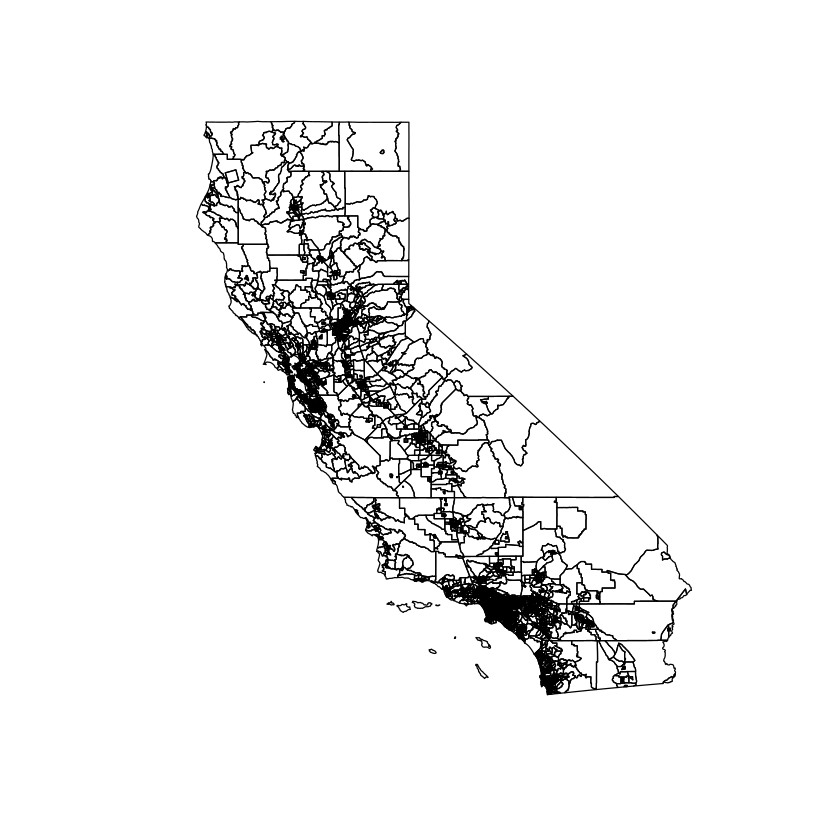

In [5]:
census_tracts = st_read("notebook_data/census/Tracts/cb_2013_06_tract_500k.shp")
plot(census_tracts$geometry)

In [6]:
head(census_tracts)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,06,001,400300,1400000US06001400300,06001400300,4003,CT,1105329,0,MULTIPOLYGON (((-122.2642 3...
2,06,001,400900,1400000US06001400900,06001400900,4009,CT,420877,0,MULTIPOLYGON (((-122.2856 3...
3,06,001,402200,1400000US06001402200,06001402200,4022,CT,712082,0,MULTIPOLYGON (((-122.304 37...
4,06,001,402800,1400000US06001402800,06001402800,4028,CT,398311,0,MULTIPOLYGON (((-122.276 37...
5,06,001,404800,1400000US06001404800,06001404800,4048,CT,628405,0,MULTIPOLYGON (((-122.2182 3...
6,06,001,406100,1400000US06001406100,06001406100,4061,CT,1843685,74875,MULTIPOLYGON (((-122.2387 3...


Then we'll grab just the Alameda Country tracts.

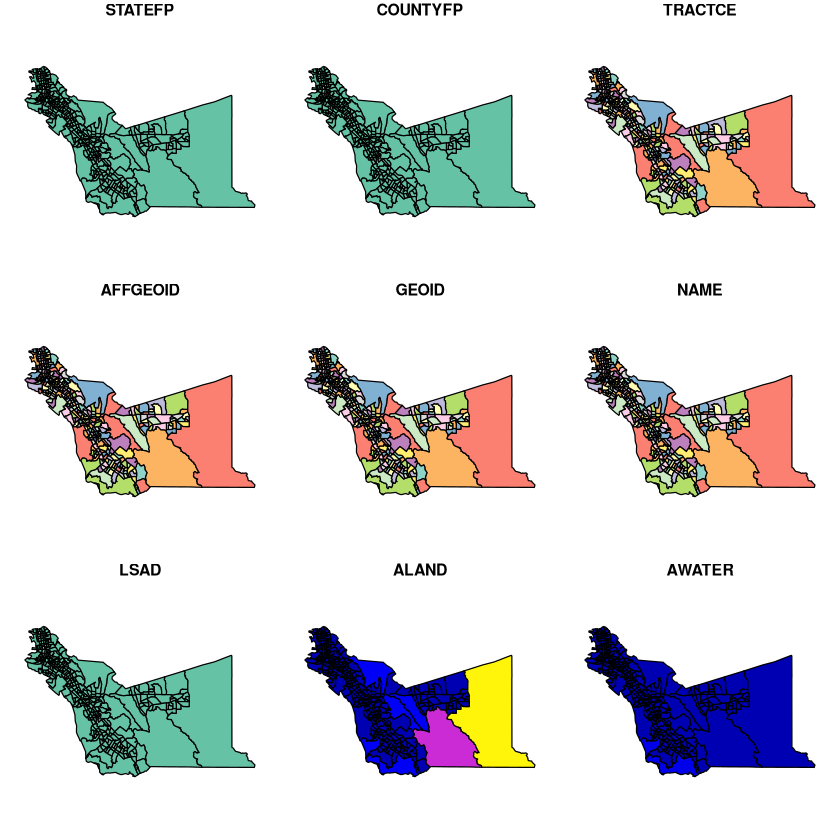

In [8]:
census_tracts_ac = census_tracts[census_tracts$COUNTYFP=='001',]
plot(census_tracts_ac)

# 6.1 Measurement Queries

We'll start off with some simple measurement queries.

For example, here's how we can get the areas of each of our census tracts.

In [9]:
st_area(census_tracts_ac)

Units: [m^2]
  [1]   1106564.4    435823.9    693541.5    400641.5    618815.4   1962114.5
  [7]    370336.5    478238.0    587716.8    857795.3    456689.8   1177606.2
 [13]   2752336.7   1324748.8   1238545.1    814375.4    942985.8    890589.4
 [19]    860594.7   1109276.5   1520261.8   1433641.8   1840907.4   2022013.6
 [25]   3927770.4    296263.5    337584.1    344254.3    176586.3    510907.2
 [31]   1018621.0    317868.3    407406.8    861642.0   1115674.7   1209065.6
 [37]    841776.7    578662.3    786232.7    579161.2    674020.0    730068.8
 [43]    725871.1    383540.8    584860.8    828882.9   2291215.4   1096249.9
 [49]   1001164.8    644525.6   1611340.1    629372.8   2004310.7   1153689.6
 [55]   2507607.1   3255864.2   1305109.6   2199927.9   1583808.3   3298267.2
 [61]   2060772.8   1157780.1   2099463.7   3675218.7   3302300.8   2017625.1
 [67]    721271.4    650778.3    173580.0    392828.5    493330.9    798939.0
 [73]    475046.3    395471.7   1969033.8    675593

Okay! 

We got... 

numbers!

...?

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

1. What do those numbers mean?
1. What are the units?
1. And if we're not sure, how might be find out?

Let's take a look at our CRS.

In [11]:
st_crs(census_tracts_ac)

Coordinate Reference System:
  User input: NAD83 
  wkt:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]

Wow! We're working in an unprojected CRS, with units of decimal degrees, but `sf` automatically gave us area measurements in square meters (rather than the rather irrational square degrees).

How did it do this? For unprojected CRS, `sf` calculates geodetic measurements (i.e. travel-distances across the earth's curved surface). It uses the `st_geod_area` function for this; see docs for details.

------------------

**That said, when doing spatial analysis, we will almost always want to work in a projected CRS
that has natural distance units, such as meters!**

Time to project!

(As previously, we'll use UTM Zone 10N with a NAD83 data.
This is a good choice for our region of interest.)

In [14]:
census_tracts_ac_utm10 = st_transform(census_tracts_ac, 26910)

In [15]:
st_crs(census_tracts_ac_utm10)

Coordinate Reference System:
  User input: EPSG:26910 
  wkt:
PROJCRS["NAD83 / UTM zone 10N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 10N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-123,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",

Now let's try our area calculation again.

In [16]:
st_area(census_tracts_ac_utm10)

Units: [m^2]
  [1]   1105796.6    435518.4    693052.3    400361.5    618393.6   1960768.5
  [7]    370083.9    477916.4    587326.6    857191.6    456368.0   1176797.3
 [13]   2750560.5   1323878.6   1237723.7    813846.5    942377.1    890019.9
 [19]    860043.4   1108594.7   1519346.8   1432792.4   1839842.7   2020865.2
 [25]   3925784.0    296054.3    337347.3    344013.5    176463.6    510553.6
 [31]   1017924.1    317648.2    407127.0    861057.4   1114923.8   1208247.6
 [37]    841210.6    578276.3    785679.9    578756.7    673546.0    729557.5
 [43]    725361.4    383273.3    584450.3    828307.1   2289740.2   1095549.6
 [49]   1000521.6    644107.4   1610300.2    628971.7   2003062.8   1152978.3
 [55]   2506014.1   3253899.1   1304288.4   2198613.8   1582862.2   3296352.4
 [61]   2059485.2   1157102.0   2098302.8   3673394.6   3300675.5   2016577.2
 [67]    720770.3    650326.1    173459.7    392559.1    492997.0    798400.5
 [73]    474710.9    395196.8   1967671.7    675123

What if we compare areas calculated from our unprojected and projected CRS?

In [18]:
print(st_area(census_tracts_ac)[[1]])
print(st_area(census_tracts_ac_utm10)[[1]])

1106564 [m^2]
1105797 [m^2]


Hmmm... The numbers are a bit different...

----------------------------

You may have noticed that our census tracts already have an area column in them.

Let's also compare those two results to this column.

In [25]:
print(st_area(census_tracts_ac)[[1]])
print(st_area(census_tracts_ac_utm10)[[1]])
print(census_tracts$ALAND[1])

1106564 [m^2]
1105797 [m^2]
[1] 1105329


<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

What explains the discrepancy? Which areas are correct? Which are incorrect?


We can also sum the area for Alameda county by wrapping our area calculation in a call to `sum`.

In [27]:
sum(st_area(census_tracts_ac_utm10))

1948917581 [m^2]

We can actually look up how large Alameda County is to check our work.The county is 739 miles<sup>2</sup>, which is around 1,914,001,213 meters<sup>2</sup>. I'd say we're pretty close!

------------

Also, you may have been wondering how R is managing to tell us the units of our measurements.

It turns out that `sf` depends on the `units` package to track units. 

This is super convenient! But there is a gotcha:

In [29]:
# convert to square kilometers
sum(st_area(census_tracts_ac_utm10)) / (1000^2)

1948.918 [m^2]

Oops! Our manual conversion to square kilometers gave us the right number but kept the now-wrong units!

Here's the proper way to convert:


In [31]:
units::set_units(sum(st_area(census_tracts_ac_utm10)), km^2)

1948.918 [km^2]

Much nicer! In case you're wondering how we knew the right abbreviation to use for kilometers,
check out the leftmost column in this reference table:

In [35]:
View(units::valid_udunits())

ERROR: Error in View(units::valid_udunits()): ‘View()’ not yet supported in the Jupyter R kernel


As it turns out, we can similarly use another attribute
to get the features' lengths.

**NOTE**: In this case, given we're
dealing with polygons, this is equivalent to getting the features' perimeters.

In [28]:
st_length(census_tracts_ac_utm10)

Units: [m]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# 6.2 Relationship Queries


[Spatial relationship queries](https://en.wikipedia.org/wiki/Spatial_relation) consider how two geometries or sets of geometries relate to one another in space. 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png" height="300px"></img>


Here is a list of some of the more commonly used `sf` spatial relationship operations.

- st_within
- st_contains
- st_intersects

<br>
However, there are several other spatial relationship predicates, though some are more complex to properly employ. For example the following two operations only work with geometries that are completely aligned.

- st_touches
- st_equals


All of these predicates takes the form:

    st_<predicate>(x, y)
    
For example:

    st_within(homes, cities)
    
to check whether homes are within cities.

------------------

---------------

Also, please keep in mind that there is no need to memorize these predicates and their functions!

[Here](https://github.com/rstudio/cheatsheets/blob/master/sf.pdf) is a fantastic `sf` cheatsheet that lists and briefly explains all these common functions (and many more).

--------------------------------

Let's load a new dataset to demonstrate these queries.

This is a dataset containing all the protected areas (parks and the like) in California.

In [36]:
pas = st_read('./notebook_data/protected_areas/CPAD_2020a_Units.shp')

Reading layer `CPAD_2020a_Units' from data source `/home/drew/Desktop/stuff/berk/dlab/Geospatial-Fundamentals-in-R-with-sf/rewrite/notebook_data/protected_areas/CPAD_2020a_Units.shp' using driver `ESRI Shapefile'
Simple feature collection with 17068 features and 21 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -374984.2 ymin: -604454.8 xmax: 540016.3 ymax: 449743.2
projected CRS:  NAD83 / California Albers


Does this need to be reprojected too?

In [37]:
st_crs(pas)

Coordinate Reference System:
  User input: NAD83 / California Albers 
  wkt:
PROJCRS["NAD83 / California Albers",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["California Albers",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",-120,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",34,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",40.5,
            ANGLEUNIT["degree",0.0174532925199

Yes it does!

Let's reproject it.

In [38]:
pas_utm10 = st_transform(pas, 26910)

One common use for spatial queries is for spatial subsetting of data.

In our case, lets use **intersects** to
find all of the parks that have land in Alameda County.

In [44]:
pas_in_ac = st_intersects(pas_utm10, census_tracts_ac_utm10)

What did we get? Lets print it and see:

In [40]:
pas_in_ac

Sparse geometry binary predicate list of length 17068, where the predicate was `intersects'
first 10 elements:
 1: (empty)
 2: (empty)
 3: (empty)
 4: (empty)
 5: (empty)
 6: (empty)
 7: (empty)
 8: (empty)
 9: (empty)
 10: (empty)

This may not look like the large matrix of logicals that we expected. 

As it turns out, this is a special data structure, defined by `sf`, that provides a terse representation of that sparse matrix (in which each protected area row number has a vector containing the census-tract row numbers of all census tracts that it intersects). 

If we set the `sparse` argument to `FALSE` (the docs say it defaults to `TRUE`) then we should get different behavior.

In [42]:
pas_in_ac = st_intersects(pas_utm10, census_tracts_ac_utm10, sparse=F)
pas_in_ac

FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Okay! That looks more interpretable.

We could certainly summarize either of those two data structures, then use it to subset our protected areas dataset, keeping only the protected areas that interset with Alameda County's census tracts.

However, it turns out that `sf` has a different function, `st_intersection`, that will do that for us all at once. It will take our two `sf` objects (`x` and `y`), then return a new `sf` object containing only the features of `x` that intersect `y`! Let's try it:

In [46]:
pas_in_ac = st_intersection(pas_utm10, census_tracts_ac_utm10)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


Great! Now, if we scroll the resulting `sf` object we'll see that 
the `COUNTY` column of our resulting subset gives us a good sanity check on our results.

In [47]:
head(pas_in_ac)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

ACCESS_TYP  UNIT_ID UNIT_NAME                     SUID_NMA AGNCY_ID
8478  Open Access 13443   Hardy Dog Park                19677    1228    
11167 Open Access 47996   Redondo Park                  32418    1228    
4954  Open Access 14781   Temescal Creek Park           26230    1098    
3585  Open Access 29165   Cypress Freeway Memorial Park 17873    1228    
8131  Open Access 13451   South Prescott Park           25676    1228    
9319  Open Access 15535   Mandela Parkway               21738    1228    
      AGNCY_NAME          AGNCY_LEV AGNCY_TYP  
8478  Oakland, City of    City      City Agency
11167 Oakland, City of    City      City Agency
4954  Emeryville, City of City      City Agency
3585  Oakland, City of    City      City Agency
8131  Oakland, City of    City      City Agency
9319  Oakland, City of    City      City Agency
      AGNCY_WEB                                             LAYER
8478  http://www2.oaklandnet.com/Government/o/opr/index.htm City 
11167 http://www2.oaklandnet.com/Government/o/opr/index.htm City 
4954  http://www.ci.emeryville.ca.us/158/City-Parks         City 
3585  http://www2.oaklandnet.com/Government/o/opr/index.htm City 
8131  http://www2.oaklandnet.com/Government/o/opr/index.htm City 
9319  http://www2.oaklandnet.com/Government/o/opr/index.htm City 
      geometry                       ⋯ STATEFP COUNTYFP TRACTCE
8478  POLYGON ((565274.7 4188544,... ⋯ 06      001      400300 
11167 POLYGON ((565005.3 4188113,... ⋯ 06      001      400300 
4954  POLYGON ((563475.6 4188002,... ⋯ 06      001      400900 
3585  POLYGON ((562225.1 4184994,... ⋯ 06      001      402200 
8131  POLYGON ((561576 4184223, 5... ⋯ 06      001      402200 
9319  POLYGON ((562327.9 4184999,... ⋯ 06      001      402200 
      AFFGEOID             GEOID       NAME LSAD ALAND   AWATER
8478  1400000US06001400300 06001400300 4003 CT   1105329 0     
11167 1400000US06001400300 06001400300 4003 CT   1105329 0     
4954  1400000US06001400900 06001400900 4009 CT    420877 0     
3585  1400000US06001402200 06001402200 4022 CT    712082 0     
8131  1400000US06001402200 06001402200 4022 CT    712082 0     
9319  1400000US06001402200 06001402200 4022 CT    712082 0     
      geometry                      
8478  POLYGON ((565274.7 4188544,...
11167 POLYGON ((565005.3 4188113,...
4954  POLYGON ((563475.6 4188002,...
3585  POLYGON ((562225.1 4184994,...
8131  POLYGON ((561576 4184223, 5...
9319  POLYGON ((562327.9 4184999,...

An overlay plot can also provide a nice check!

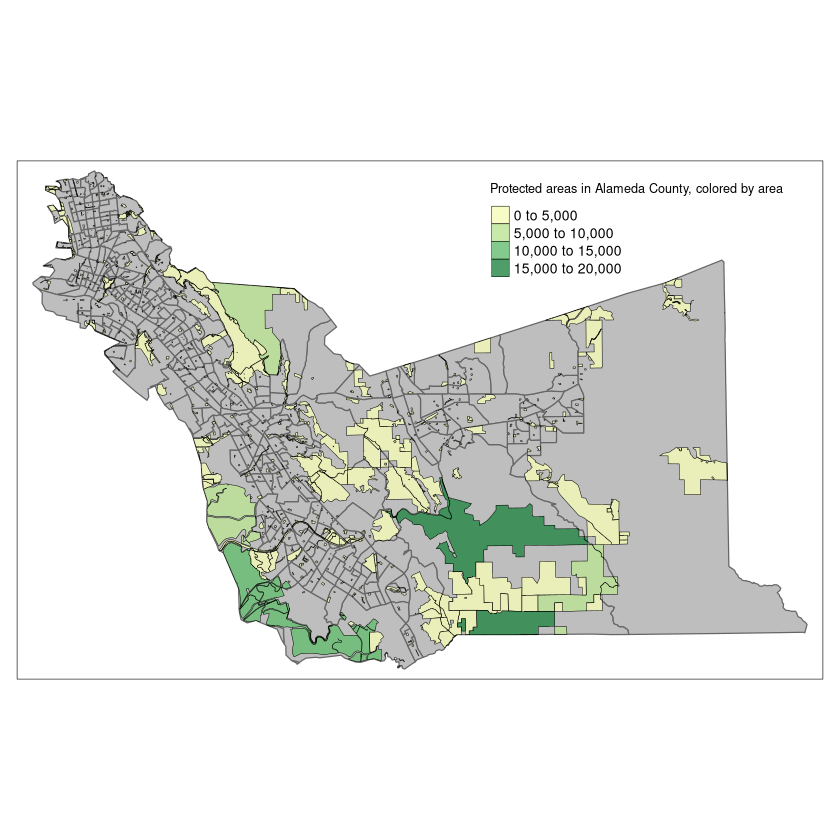

In [51]:
tm_shape(census_tracts_ac_utm10) + 
  tm_polygons(col='gray') +
tm_shape(pas_in_ac) + 
  tm_polygons(col = 'ACRES', palette = 'YlGn',
              border.col = 'black', lwd = 0.4, 
              alpha = 0.8,
              title =  'Protected areas in Alameda County, colored by area')

# Exercise: Spatial Relationship Query

Let's use a spatial relationship query to create a new dataset containing Berkeley schools!

Run the next two cells to load datasets containing Berkeley's city boundary and Alameda County's
schools and to reproject them to EPSG: 26910.

Then in the following cell, write your own code to:
1. subset the schools for only those `within` Berkeley
2. plot the Berkeley boundary and then the schools as an overlay map

To see the solution, double-click the Markdown cell below.

In [60]:
# load the Berkeley boundary
berkeley = st_read("notebook_data/berkeley/BerkeleyCityLimits.shp")

# transform to EPSG:26910
berkeley_utm10 = st_transform(berkeley, 26910)

# display
head(berkeley_utm10)

Reading layer `BerkeleyCityLimits' from data source `/home/drew/Desktop/stuff/berk/dlab/Geospatial-Fundamentals-in-R-with-sf/rewrite/notebook_data/berkeley/BerkeleyCityLimits.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: 559379.3 ymin: 4188957 xmax: 567366 ymax: 4195607
projected CRS:  WGS 84 / UTM zone 10N


ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

,CNTY_FIPS,geometry
,<chr>,<POLYGON [m]>
1,001,"POLYGON ((564128 4195463, 5..."


In [68]:
# load the Alameda County schools CSV
schools_df = read.csv('notebook_data/alco_schools.csv')

# coerce it to an `sf` object and set its CRS
schools_sf = st_as_sf(schools_df, coords = c('X', 'Y'), crs = 4326)

# transform to EPSG:26910
schools_sf_utm10 = st_transform(schools_sf, 26910)

# display
head(schools_sf_utm10)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

,Site,Address,City,State,Type,API,Org,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<POINT [m]>
1,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public,POINT (567066.2 4177769)
2,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public,POINT (565917.7 4177121)
3,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public,POINT (565275.4 4179674)
4,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public,POINT (567393 4180045)
5,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public,POINT (567118.1 4178791)
6,Franklin Elementary,1433 San Antonio Ave,Alameda,CA,ES,893,Public,POINT (565035.5 4180454)


In [ ]:
# YOUR CODE HERE:






## Double-click to see solution!

<!--

# SOLUTION:

# get the boolean Series indicating which schools are in Berkeley
schools_in_berkeley = schools_gdf_utm10.within(berkeley_utm10.geometry.squeeze())

# use that series to subset the schools for only those that are in Berkeley
berkeley_schools = schools_gdf_utm10[schools_in_berkeley]

# create a fig with one Axes object
fig, ax = plt.subplots(figsize=(10,10))
# plot the Berkeley border on those Axes
berkeley_utm10.plot(color='lightgrey', ax=ax)
# add the Berkeley schools to those Axes
berkeley_schools.plot(color='purple',ax=ax)

-->

-------------------------------

# 6.3 Proximity Analysis

Now that we've seen the basic idea of spatial measurement and relationship queries,
let's take a look at a common analysis that combines those concepts: **promximity analysis**.

Proximity analysis seeks to identify all features in a focal feature set
that are within some maximum distance of features in a reference feature set.

A common workflow for this analysis is:

1. Buffer (i.e. add a margin around) the reference dataset, out to the maximum distance.
1. Run a spatial relationship query to find all focal features that intersect (or are within) the buffer.

---------------------------------

Let's read in our bike boulevard data again.

Then we'll find out which of our Berkeley schools are within a block's distance (200 m) of the boulevards.

Reading layer `BerkeleyBikeBlvds' from data source `/home/drew/Desktop/stuff/berk/dlab/Geospatial-Fundamentals-in-R-with-sf/rewrite/notebook_data/transportation/BerkeleyBikeBlvds.geojson' using driver `GeoJSON'
Simple feature collection with 211 features and 10 fields
geometry type:  MULTILINESTRING
dimension:      XY
bbox:           xmin: 561541.2 ymin: 4189007 xmax: 566451.6 ymax: 4193483
projected CRS:  WGS 84 / UTM zone 10N


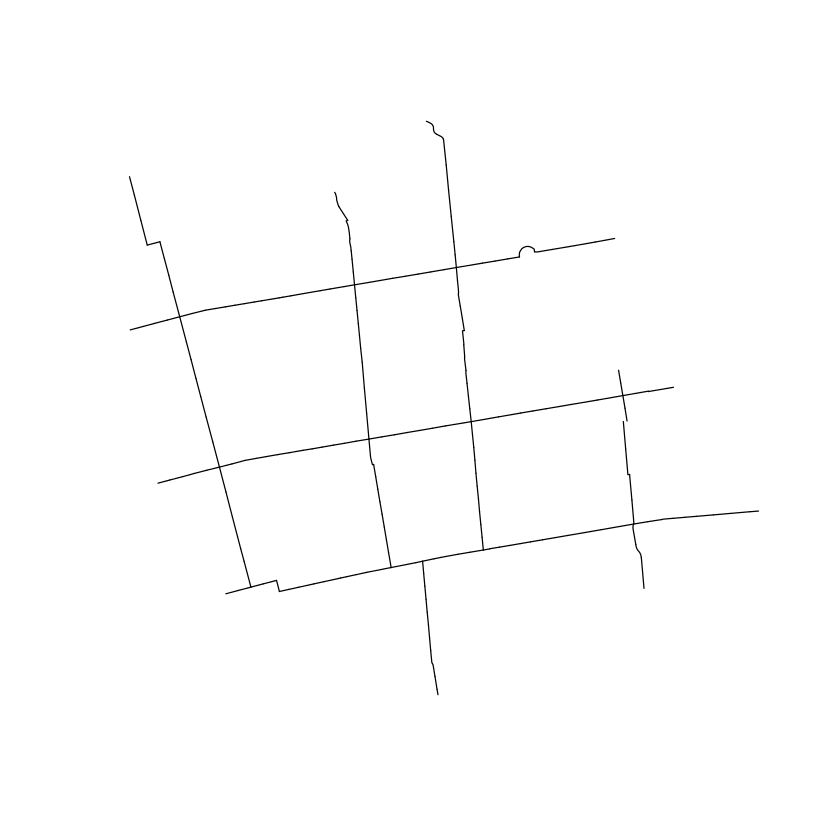

In [53]:
bike_blvds = st_read('notebook_data/transportation/BerkeleyBikeBlvds.geojson')
plot(bike_blvds$geometry)

Of course, we need to reproject the boulevards to our projected CRS.

(We'll aim at the CRS of `census_tracts_ac_utm10`, to be as explicit as possible and make sure we hit our target.)

In [55]:
bike_blvds_utm10 = st_transform(bike_blvds, st_crs(census_tracts_ac_utm10))

Now we can create our 200 meter bike boulevard buffers.

In [59]:
bike_blvds_buf = st_buffer(bike_blvds_utm10, dist=200)

Now let's overlay everything.

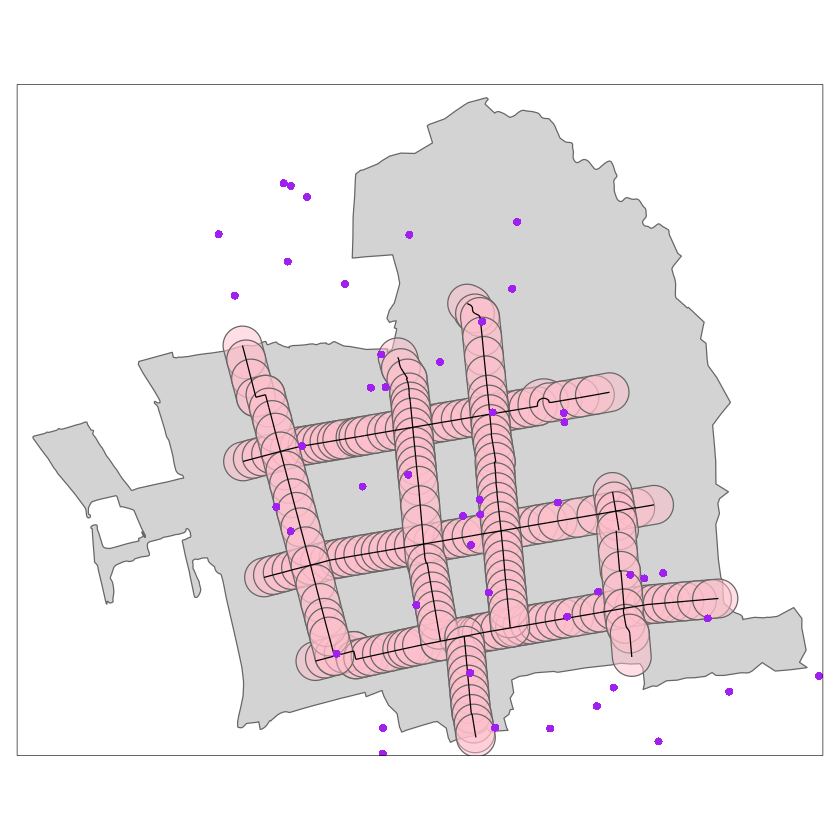

In [66]:
tm_shape(berkeley_utm10) + 
  tm_polygons(col = 'lightgrey') + 
tm_shape(bike_blvds_buf) + 
  tm_polygons(col = 'pink', alpha = 0.5) +
tm_shape(bike_blvds_utm10) + 
  tm_lines() + 
tm_shape(schools_sf_utm10) + 
  tm_dots(col = 'purple', size=0.2)

Great! Looks like we're all ready to run our intersection to complete the proximity analysis.

In [69]:
schools_near_blvds = st_intersection(schools_sf_utm10, bike_blvds_buf)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


Now let's overlay again, to see if the schools we subsetted make sense.

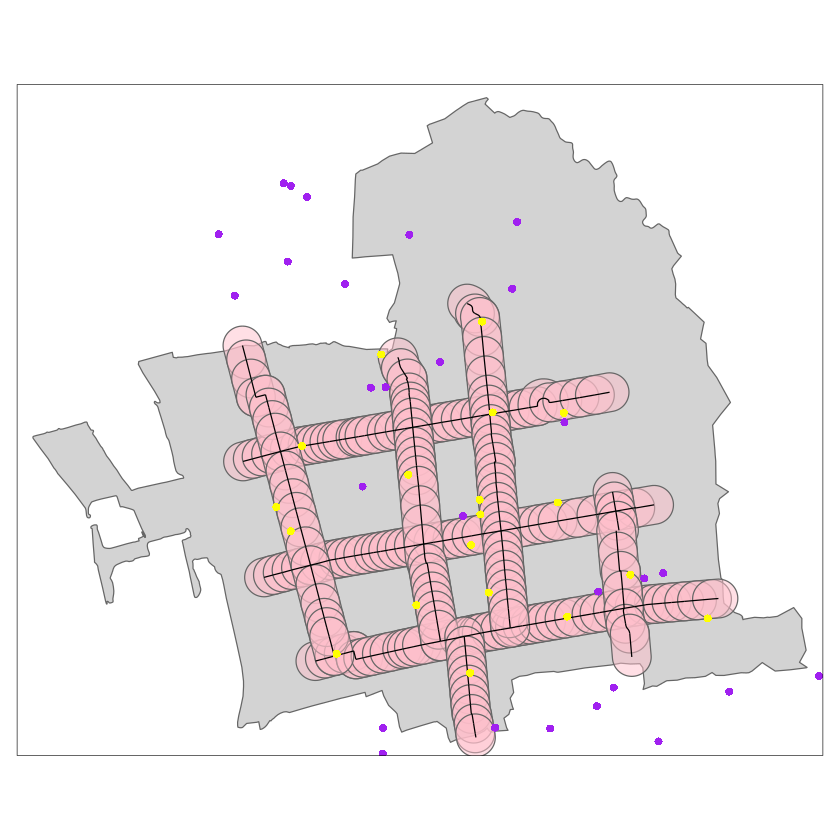

In [71]:
tm_shape(berkeley_utm10) + 
  tm_polygons(col = 'lightgrey') + 
tm_shape(bike_blvds_buf) + 
  tm_polygons(col = 'pink', alpha = 0.5) +
tm_shape(bike_blvds_utm10) + 
  tm_lines() + 
tm_shape(schools_sf_utm10) + 
  tm_dots(col = 'purple', size=0.2) +
tm_shape(schools_near_blvds) + 
  tm_dots(col = 'yellow', size=0.2)

Also note that if we want to find the pairwise distance matrix of the shortest distances between
our schools and the bike boulevards, we can use the `st_distance` function.

In [73]:
st_distance(schools_sf_utm10, bike_blvds_utm10)

Units: [m]
             [,1]        [,2]        [,3]        [,4]       [,5]       [,6]
  [1,] 12926.4075 12915.57786 12905.62812 12895.52945 12806.3478 12796.5968
  [2,] 13180.8437 13179.98887 13179.86220 13179.92992 13090.7974 13088.6764
  [3,] 10548.8809 10547.50866 10547.12200 10547.09849 10457.8580 10455.7743
  [4,] 10980.9036 10959.89796 10939.95925 10919.34468 10831.4252 10814.1386
  [5,] 12000.3331 11986.04926 11972.72466 11959.09015 11870.2321 11857.9561
  [6,]  9732.6277  9731.47581  9731.30202  9731.39213  9642.5325  9640.8014
  [7,]  9975.6666  9965.39554  9956.22925  9947.21732  9857.9471  9849.1335
  [8,]  7956.9161  7976.36035  7996.96537  8018.63870  7955.5846  7955.5846
  [9,]  9159.2047  9165.86165  9173.59790  9182.38925  9103.4961  9103.4961
 [10,]  9122.2892  9140.77047  9160.26372  9180.68673  9115.8317  9115.8317
 [11,]  8550.1446  8569.67173  8590.27430  8611.86250  8548.5813  8548.5813
 [12,] 12396.1524 12379.27915 12363.35254 12346.91156 12258.3865 12244.0617
 

# Exercise: Proximity Analysis

Now it's your turn to try out a proximity analysis!

Run the next cell to load our BART-system data, reproject it to EPSG: 26910, and subset it to Berkeley.

Then in the following cell, write your own code to find all schools within walking distance (1 km) of a BART station.

As a reminder, let's break this into steps:
1. buffer your Berkeley BART stations to 1 km (**HINT**: remember your units!)
2. use the schools' `within` attribute to check whether or not they're within the buffers (**HINT**: don't forget the `unary_union`!)
3. subset the Berkeley schools using the object returned by your spatial relationship query

4. as always, plot your results for a good visual check!

To see the solution, double-click the Markdown cell below.

In [ ]:
# load the BART stations from CSV
bart_stations = pd.read_csv('notebook_data/transportation/bart.csv')
# coerce to a GeoDataFrame
bart_stations_gdf = gpd.GeoDataFrame(bart_stations, 
                               geometry=gpd.points_from_xy(bart_stations.lon, bart_stations.lat))
# define its unprojected (EPSG:4326) CRS
bart_stations_gdf.crs = "epsg:4326"
# transform to UTM Zone 10 N (EPSG:26910)
bart_stations_gdf_utm10 = bart_stations_gdf.to_crs( "epsg:26910")
# subset to Berkeley
berkeley_bart = bart_stations_gdf_utm10[bart_stations_gdf_utm10.within(berkeley_utm10.unary_union)]

In [ ]:
# YOUR CODE HERE:







## Double-click to see solution!

<!--

# SOLUTION

# buffer the BART stations to 1 km
bart_buf = berkeley_bart.buffer(distance=1000)
# check whether or not each school is within a buffer
schools_near_bart = berkeley_schools.within(bart_buf.unary_union)
# subset the schools using the boolean Series you just produced
bart_schools = berkeley_schools[schools_near_bart]

# create a fig with one Axes object
fig, ax = plt.subplots(figsize=(10,10))
# plot the Berkeley boundary (for reference)
berkeley_utm10.plot(color='lightgrey', ax=ax)
# plot the BART stations (for reference)
berkeley_bart.plot(color='green', ax=ax)
# add the BART buffers (for check)
bart_buf.plot(color='lightgreen', ax=ax, alpha=0.5)
# add all Berkeley schools (for reference)
berkeley_schools.plot(ax=ax)
# add the schools near BART (for check)
bart_schools.plot(color='yellow', markersize=50, ax=ax)

-->

----------------------------------

## 6.4 Recap
Leveraging what we've learned in our earlier lessons, we got to work with map overlays and start answering questions related to proximity. Key concepts include:
- Measuring area and length
	- `st_area`, 
	- `st_length`
- Relationship Queries
	- `st_intersects`, `st_intersection`
	- `st_within`, etc.
- Buffer analysis
	- `st_buffer`
	- `st_distance`

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        


